In [12]:
# Representación del laberinto como una matriz
laberinto = [
    [1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 1],
    [1, 0, 1, 1, 1, 0, 1],
    [1, 0, 0, 0, 1, 0, 1],
    [1, 1, 1, 0, 1, 0, 1],
    [1, 1, 1, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1]
]

# BFS para resolver el laberinto
def bfs(laberinto, inicio, fin):
    # Direcciones para moverse en el laberinto: arriba, abajo, izquierda, derecha
    movimientos = [(0, -1), (0, 1), (-1, 0), (1, 0)]

    # Verificar si una posición es válida y se puede visitar
    def es_valido(y, x):
        if y < 0 or y >= len(laberinto) or x < 0 or x >= len(laberinto[0]):
            return False
        if laberinto[y][x] == 1:
            return False
        return True

    # Cola para BFS
    cola = [inicio]
    # Diccionario para rastrear el camino
    camino = {inicio: None}

    while cola:
        actual = cola.pop(0)
        if actual == fin:
            break

        for movimiento in movimientos:
            siguiente = (actual[0] + movimiento[0], actual[1] + movimiento[1])
            if es_valido(*siguiente) and siguiente not in camino:
                cola.append(siguiente)
                camino[siguiente] = actual

    # Reconstruir el camino
    if fin not in camino:
        return None  # No hay camino

    ruta = []
    actual = fin
    while actual:
        ruta.append(actual)
        actual = camino[actual]
    ruta.reverse()

    return ruta

# Puntos de inicio y fin en el laberinto
inicio = (1, 1)  # Suponiendo que el inicio es (1, 1)
fin = (5, 5)    # Suponiendo que el fin es (5, 5)

# Ejecutar BFS
ruta = bfs(laberinto, inicio, fin)
ruta


[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 5), (3, 5), (4, 5), (5, 5)]

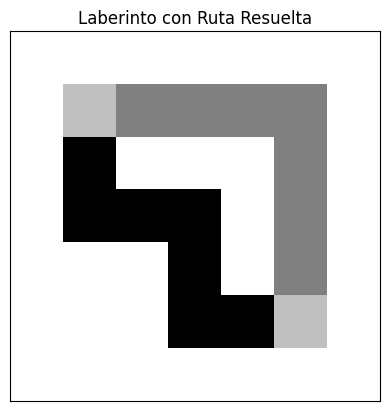

In [13]:
import matplotlib.pyplot as plt
import numpy as np

def visualizar_laberinto(laberinto, ruta):
    # Convertir el laberinto en un array de numpy para facilitar la visualización
    laberinto_np = np.array(laberinto)
    
    # Crear una matriz para la visualización
    visualizacion = np.zeros_like(laberinto_np, dtype=float)
    for y, x in ruta:
        visualizacion[y, x] = 0.5  # Marcar el camino

    # Marcar el inicio y el fin
    inicio_y, inicio_x = ruta[0]
    fin_y, fin_x = ruta[-1]
    visualizacion[inicio_y, inicio_x] = 0.75
    visualizacion[fin_y, fin_x] = 0.75

    # Paredes
    visualizacion[laberinto_np == 1] = 1

    # Crear el gráfico
    plt.imshow(visualizacion, cmap='gray')
    plt.xticks([]), plt.yticks([])  # Ocultar los ejes
    plt.title("Laberinto con Ruta Resuelta")
    plt.show()

# Llamada a la función de visualización con el laberinto y la ruta
visualizar_laberinto(laberinto, ruta)


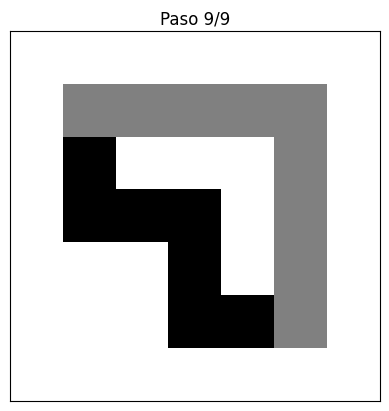

In [14]:
import matplotlib.animation as animation

def actualizar_cuadro(num, ruta, laberinto_np, visualizacion, plot):
    # Limpiar la visualización actual
    plot.cla()

    # Actualizar la posición en la ruta
    y, x = ruta[num]
    visualizacion[y, x] = 0.5  # Marcar la posición actual en el camino

    # Paredes
    visualizacion[laberinto_np == 1] = 1

    # Dibujar el estado actual del laberinto
    plot.imshow(visualizacion, cmap='gray')
    plot.set_title(f"Paso {num + 1}/{len(ruta)}")

    # Ocultar los ejes
    plot.set_xticks([])
    plot.set_yticks([])

# Crear una matriz para la visualización de la animación
laberinto_np = np.array(laberinto)
visualizacion_anim = np.zeros_like(laberinto_np, dtype=float)

# Crear la figura y los ejes para la animación
fig, ax = plt.subplots()

# Crear la animación
ani = animation.FuncAnimation(fig, actualizar_cuadro, frames=len(ruta), fargs=(ruta, laberinto_np, visualizacion_anim, ax), interval=300)

# Guardar la animación como un archivo .gif
ani.save('animacion.gif', writer='pillow')

# La línea plt.show() solo es necesaria si también deseas ver la animación en línea
# plt.show()

# Mostrar la animación
plt.show()



